#**Fajri Yanti** 

> M03 - m314y0826@dicoding.org/20106311700069@student.unsika.ac.id

> Universitas Singaperbangsa Karawang






**train.csv:**

A full training dataset with the following attributes:
*   id: unique id for a news article
*   text: the text of the article; could be incomplete
*   author: author of the news article
*   title: the title of a news article
*   label: a label that marks the article as potentially unreliable
*   1: unreliable
*   0: reliable




In [53]:
import seaborn as sns
import nltk
import csv
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [55]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [56]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [58]:
df = df.drop(columns=['id', 'author', 'title'], axis=1)

In [59]:
df = df.dropna(axis=0)

In [60]:
len(df)

20761

In [61]:
df_news= df['text'].str.lower()
df_news

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: text, Length: 20761, dtype: object

In [62]:
df_news = df_news.str.replace('\n', ' ')
df_news = df_news.str.replace('[^A-Za-z0-9\s]', '')
df_news = df_news.str.replace('\s+', ' ')

df_news

0        house dem aide we didnt even see comeys letter...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29 2...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t i unloaded on black celebrities who m...
20796    when the green bay packers lost to the washing...
20797    the macys of today grew from the union of seve...
20798    nato russia to hold parallel exercises in balk...
20799     david swanson is an author activist journalis...
Name: text, Length: 20761, dtype: object

In [63]:
stop = stopwords.words('english')
df_news = df_news.apply(lambda x: " ".join([word for word in x.split() if word not in stop])) 
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


##**Word Tokenization-Embedding**

In [64]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_news)
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

187330

In [65]:
sequences = tokenizer.texts_to_sequences(df_news)
sequence_train = pad_sequences(sequences, maxlen=700, 
                               padding='post', truncating='post')

**Embedding Matrix**

In [66]:
from keras.layers import Embedding
embedding_index = {}
with open('glove.6B.100d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs

In [67]:
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
       embedding_matrix[i] = embedding_vector

In [68]:
embedding_matrix[2]

array([-0.24683   , -0.045153  , -0.29971999,  0.0937    , -0.34841999,
       -0.46226999, -0.10377   ,  0.45923999, -0.07445   , -0.58451003,
        0.47005999,  0.35023999,  0.84766001,  0.19461   , -0.026859  ,
       -0.39385   , -0.49254   , -0.089339  , -0.61903   ,  0.69009   ,
       -0.15106   , -0.84705001, -0.15933   , -0.95722002,  0.15478   ,
        0.37959   ,  0.72816998, -0.29701999, -0.12257   ,  0.21346   ,
        0.21806   ,  0.91428   ,  0.37544   ,  0.033504  , -0.25409001,
        0.85389   ,  0.26176   ,  0.45006001, -0.29513001, -0.69571   ,
       -0.54319   , -0.42732   ,  0.70349002, -0.27261999, -0.012136  ,
        0.31689   , -0.47824001, -0.37551001, -0.083939  , -0.37176999,
        0.25060001,  0.26706001,  0.75913   ,  0.21206   , -0.44014001,
       -1.1652    , -0.26971999,  0.39151999,  0.017277  , -0.77004999,
        0.10493   , -0.047084  , -1.17840004,  0.2138    ,  0.88777   ,
        0.45394999,  0.43608999,  0.81035   ,  0.16952001,  0.32

In [69]:
sequence_train[2]

array([  592,   109,    28,  1313,   256,  1725,    60,  4585,   331,
        1977,    52, 14577,   227,  2463,  9051,  7926,   560,  4500,
         204,  3634,    74,   527,    55,  1702,  6571, 11718,  6571,
       11718,   109,  2089,   149,   122,  4476,  1324,    37,   453,
        2647,  5735,   109,  2732,   494,  1304,   466,  2564,    25,
          19,  4190,   521,  3346,    43,   262,  1944,  2483,   595,
        1023,   778,  6063,  2429,   527,     4,   734,    64,  1175,
         793,   932,  5177,  6243,  5134,  7966,  2506,   390,   551,
        4028,   551,   913,  1893,   180,   448,   263,   773,  1180,
         814, 18279,   319,  1190,   131,   445,   430,    11,   595,
        1023,   778,   914,    11,  6268, 11078,  1377,  3251,   128,
        1213,  1829,   202,   595, 19466,     9,  1038,   243,   556,
        5585,  2217,    72,    45,    40,  1135,  3604,  9496,  2571,
         527,   167,  3511,   390,   102,    11,   778,   328,  3352,
        1436,  3402,

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sequence_train, df['label'],
                                                    test_size=0.2, random_state=42,
                                                    stratify=df['label'])

##**MODEL TRAINING**

In [71]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from  keras import Sequential 

model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    LSTM(128),
    Dropout(0.2),
    Dense(512),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [72]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics='accuracy'
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         18733100  
                                                                 
 dropout_6 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_4 (LSTM)               (None, None, 128)         117248    
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               66048     
                                                                 
 dropout_8 (Dropout)         (None, 512)              

In [73]:
accuracy_threshold = 98e-2
class cbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, 
                  '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100),
                  'training has been stopped.')
            self.model.stop_training = True

In [74]:
history = model.fit(x_train, y_train, epochs=14, batch_size=128, 
                    validation_data=[x_test, y_test], callbacks = [cbacks()])

Epoch 1/14
130/130 [==============================] - 18s 114ms/step - loss: 0.6756 - accuracy: 0.5537 - val_loss: 0.6487 - val_accuracy: 0.6092
Epoch 2/14
130/130 [==============================] - 14s 106ms/step - loss: 0.6575 - accuracy: 0.5720 - val_loss: 0.7352 - val_accuracy: 0.5449
Epoch 3/14
130/130 [==============================] - 14s 108ms/step - loss: 0.6820 - accuracy: 0.5359 - val_loss: 0.6851 - val_accuracy: 0.5541
Epoch 4/14
130/130 [==============================] - 14s 106ms/step - loss: 0.6729 - accuracy: 0.5487 - val_loss: 0.6360 - val_accuracy: 0.6299
Epoch 5/14
130/130 [==============================] - 14s 108ms/step - loss: 0.6539 - accuracy: 0.5894 - val_loss: 0.6434 - val_accuracy: 0.5685
Epoch 6/14
130/130 [==============================] - 15s 112ms/step - loss: 0.5667 - accuracy: 0.7182 - val_loss: 0.4943 - val_accuracy: 0.7830
Epoch 7/14
130/130 [==============================] - 13s 104ms/step - loss: 0.4088 - accuracy: 0.8179 - val_loss: 0.3266 - val_ac

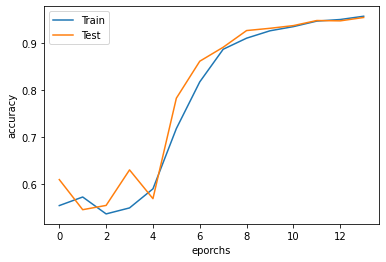

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('eporchs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

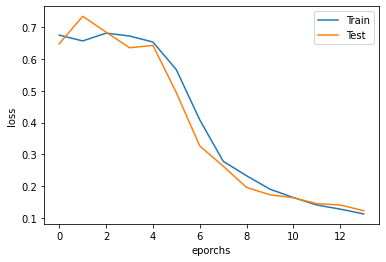

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eporchs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()